In [4]:
import pandas as pd    
import seaborn as sns    
import plotly.graph_objects as go
from plotly.offline import plot
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

Dataset = pd.read_excel("./Sample - Superstore.xlsx", "Orders")

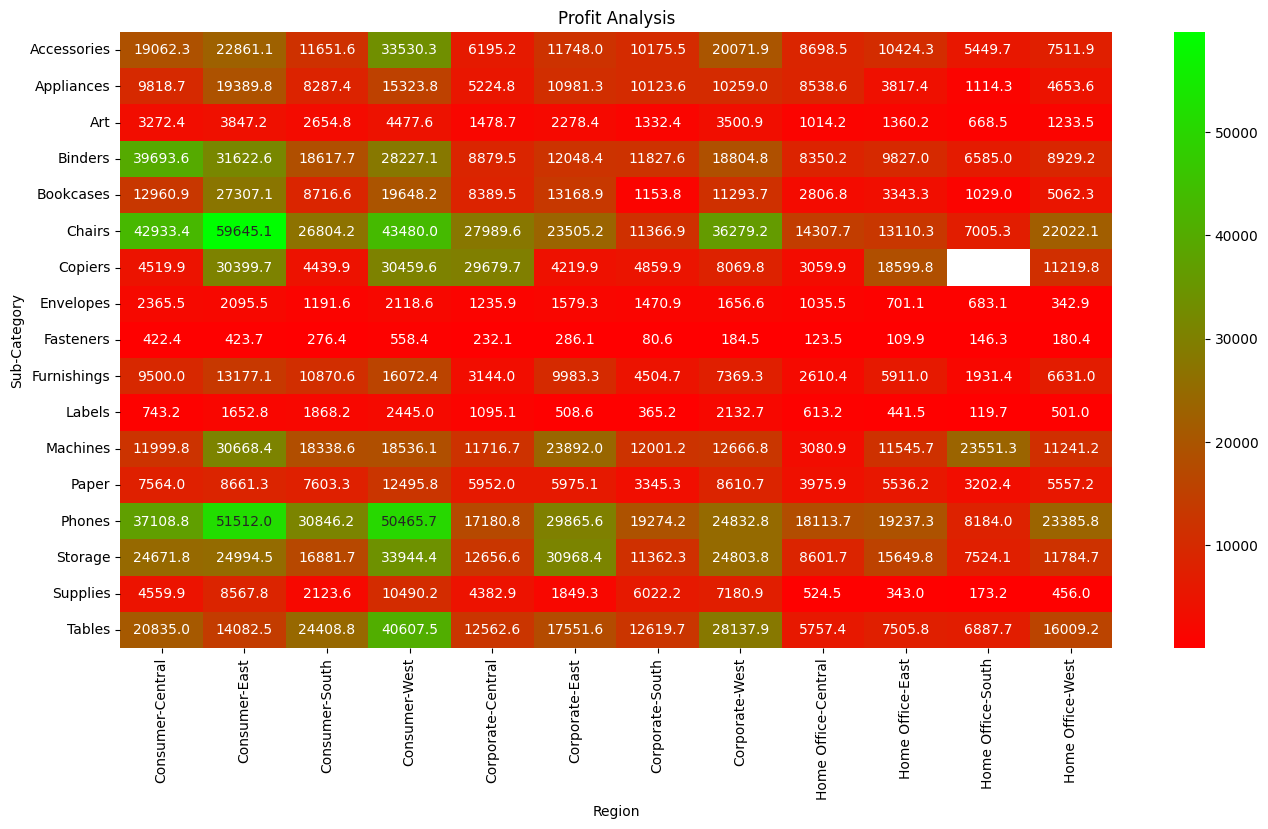

In [5]:
# Task - 1 :- To create a highlight table to explore how profit varies across regions, product sub-categories,
# and customer segments in the Superstore dataset

Pivot_Table = pd.pivot_table(
    Dataset,
    values="Sales",
    columns=["Segment", "Region"],
    index="Sub-Category",
    aggfunc="sum",
)
colors = [(1, 0, 0), (0, 1, 0)]
cmap_name = "custom_colormap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
plt.figure(figsize=(16, 8))
sns.heatmap(data=Pivot_Table, annot=True, cmap=cm, fmt="0.1f")
plt.title("Profit Analysis")
plt.xlabel("Region")
plt.ylabel("Sub-Category")
plt.show()

In [14]:
# Task 2 :- To build a simple map, using Superstore dataset with location data (for example, location names or 
# latitude and longitude coordinates (Region & State)).

state_wise_profit = Dataset.groupby("State")["Profit"].sum().reset_index()
new_Dataset = pd.read_excel("./Sample - Superstore.xlsx", "Sheet6")

Map_Dataset = pd.DataFrame(
    {
        "State": state_wise_profit["State"],
        "Profit": state_wise_profit["Profit"],
        "State_Code": new_Dataset["State_Code"],
    }
)

Data = dict(
    type="choropleth",
    locations=Map_Dataset["State_Code"],
    locationmode="USA-states",
    colorscale="RdYlGn",
    text=Map_Dataset["State"],
    z=Map_Dataset["Profit"],
    colorbar={"title": "Profit"},
)

layout = dict(geo={"scope": "usa"})
chmap = go.Figure(data=[Data], layout=layout)
plotly_html = plot(chmap, filename="choropleth_map.html", auto_open=True)


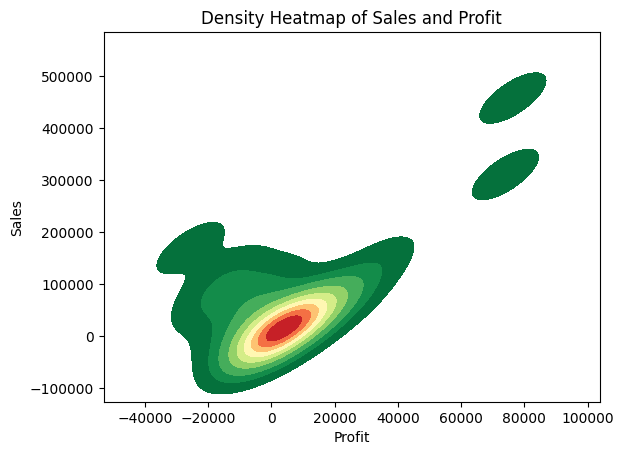

In [15]:
# Task 3: To create a density heat map using the sample dataset pertaining to sales in an electronics store.

New_Dataset = Dataset.groupby("State")[["Profit", "Sales"]].sum()
New_Dataset = pd.DataFrame(New_Dataset)
sns.kdeplot(data=New_Dataset, x="Profit", y="Sales", cmap="RdYlGn_r", fill=True)
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Density Heatmap of Sales and Profit")
plt.show()